In [9]:
from sklearn import datasets
import math
iris = datasets.load_iris()
print (iris.data)
print (iris.target)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

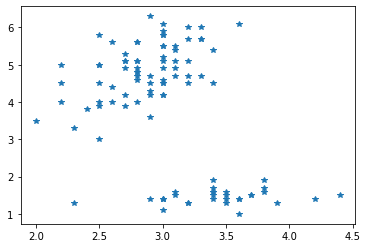

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Ciris = np.c_[iris.data.reshape(len(iris.data), -1), iris.target.reshape(len(iris.target), -1)]
np.random.seed(0)
np.random.shuffle(Ciris)
shuffledIrisData = Ciris[ :, :iris.data.size//len(iris.data)].reshape(iris.data.shape)
shuffledIrisTarget = Ciris[ :, iris.data.size//len(iris.data) :].reshape(iris.target.shape)
#print (shuffledIrisData)
#print (shuffledIrisTarget)

#Division de l'apprentissage
trainData = shuffledIrisData[:100,:]
trainTarget = shuffledIrisTarget[:100]

#Division du dev
devData = shuffledIrisData[100:130,:]
devTarget = shuffledIrisTarget[100:130]

#Division du test
testData = shuffledIrisData[130:150,:]
testTarget = shuffledIrisTarget[-20:]

p1 = trainData[:,1]
p2 = trainData[:,2]
plt.plot(p1,p2,'*')
plt.show()

In [11]:
#Mono-Feature

p = [None]*3
m = [None]*3
v = [None]*3

#Calcul de la probabilité à prioris, moyenne et variance d'une seule feature
for i in range(0,3):
    p[i] = (trainTarget == i).sum() / len(trainTarget)
    m[i] = trainData[trainTarget==i][:,0].mean()
    v[i] = trainData[trainTarget==i][:,0].var()

print("Proba à prioris : " + str(p))
print("Moyenne Mono-Feature: " + str(m))
print("Variance Mono-Feature: \n" + str(v))

#Calcul de la probabilité à prioris, moyenne et variance de toutes les features
nbFeature = 4
m2 = np.zeros(3*nbFeature).reshape(nbFeature,3)
v2 = np.zeros(3*nbFeature).reshape(nbFeature,3)

for i in range(0,3):
    for j in range(0,nbFeature):
        m2[j,i] = trainData[trainTarget==i][:,j].mean()
        v2[j,i] = trainData[trainTarget==i][:,j].var()

print("\nMoyennes multi-feature : \n", m2)
print("\nVariances multi-feature : \n", v2)

Proba à prioris : [0.31, 0.33, 0.36]
Moyenne Mono-Feature: [4.961290322580646, 5.912121212121211, 6.455555555555555]
Variance Mono-Feature: 
[0.13140478668054117, 0.2647015610651975, 0.3008024691358025]

Moyennes multi-feature : 
 [[4.96129032 5.91212121 6.45555556]
 [3.42903226 2.78484848 2.92777778]
 [1.46451613 4.27272727 5.41944444]
 [0.2483871  1.33939394 1.98888889]]

Variances multi-feature : 
 [[0.13140479 0.26470156 0.30080247]
 [0.16270552 0.10613407 0.08533951]
 [0.03583767 0.21955923 0.18434414]
 [0.0108845  0.03208448 0.0804321 ]]


In [14]:
#Fonction calculant la vraissemblance
def calculVrai(x, sigma, mu):
    res = (1/(sigma*(np.sqrt(2*np.pi))))*np.exp( (-1/2)*((x - mu)/sigma)**2)
    return res

tailleDevTarget = len(devTarget)

#Calcul de la vraissemblance mono-feature
vraissemblance = np.zeros(tailleDevTarget*3).reshape(tailleDevTarget,3)
for i in range (0,tailleDevTarget):
    for j in range(0,3):
        vraissemblance[i,j] = calculVrai(devData[i,j], v[j], m[j])

print(f"Vraissemblance {vraissemblance}")
#On cherche le maximum
val = np.argmax(vraissemblance, axis=1)

print("--------------------------")
print(val)
#On compare les valeurs trouvées et les valeurs de l'énoncé
erreur = 0
for i in range(0,tailleDevTarget):
    if(val[i] != devTarget[i]):
        erreur += 1

for i in range(0,tailleDevTarget):
    print("Classe estimee :", val[i], "  Classe target :", devTarget[i])

print("\nTaux d'erreur : " + str(erreur/tailleDevTarget*100),"%")
print("Nb erreurs : ", erreur)

proba=(np.ones(tailleDevTarget*3)).reshape(tailleDevTarget,3)

for i in range(0,tailleDevTarget):
    for j in range(0,3):
        for k in range(0,nbFeature):
            proba[i,j] *= calculVrai(devData[i,k], v2[k,j], m2[k,j])
        proba[i,j]*=p[j]

val = np.argmax(proba, axis=1)
erreur = 0
for i in range(0,tailleDevTarget):
    if(val[i] != devTarget[i]):
        erreur += 1

for i in range(0,tailleDevTarget):
    print("Classe estimee : ", val[i], "Classe target : ", devTarget[i])

print("Taux d'erreur : " + str(erreur/tailleDevTarget*100),"%")
print("Nb erreurs : ", erreur)

Vraissemblance [[3.31410719e-004 7.87127209e-027 2.15832944e-064]
 [1.15319613e-002 4.27438430e-013 7.05265085e-055]
 [6.80347121e-004 5.52538706e-041 4.48619701e-015]
 [9.24111212e-043 2.41050914e-023 2.40947021e-001]
 [8.32532899e-088 7.87127209e-027 1.18183506e+000]
 [1.73915314e+000 1.40066232e-018 6.09078301e-062]
 [2.72306646e+000 4.67808665e-025 1.53897194e-059]
 [5.83051360e-001 4.17101138e-020 6.09078301e-062]
 [4.16719374e-007 1.45227815e-030 8.80990710e-010]
 [5.15129291e-034 7.87127209e-027 9.60170530e-011]
 [2.90706652e+000 2.41050914e-023 6.84801213e-067]
 [1.73915314e+000 1.07687796e-021 7.05265085e-055]
 [2.83173605e-026 1.14825613e-028 9.36974120e-012]
 [1.15319613e-002 4.17101138e-020 1.53897194e-059]
 [1.43854560e-094 1.51399142e-034 4.45221492e-001]
 [2.72306646e+000 8.91796489e-039 1.68127864e-024]
 [7.55834099e-109 2.25274877e-014 1.30383189e+000]
 [2.91458803e-038 4.67808665e-025 9.60170530e-011]
 [5.83051360e-001 1.00287482e-010 1.53897194e-059]
 [8.20652649e-01

In [6]:
proba=(np.ones(20*3)).reshape(20,3)

tailleTestTarget = len(testTarget)

for i in range(0,tailleTestTarget):
    for j in range(0,3):
        for k in range(0,4):
            proba[i,j] *= calculVrai(testData[i,k], v2[k,j], m2[k,j])
        proba[i,j]*=p[j]

val = np.argmax(proba, axis=1)
erreur = 0
for i in range(0,tailleTestTarget):
    if(val[i] != testTarget[i]):
        erreur += 1
for i in range(0,tailleTestTarget):
    print("Classe estimee : ", val[i], "Classe target : ", testTarget[i])

print("Taux d'erreur : " + str(erreur/30*100), "%")
print("Nb erreurs : ", erreur)

Classe estimee :  2 Classe target :  2.0
Classe estimee :  2 Classe target :  2.0
Classe estimee :  2 Classe target :  1.0
Classe estimee :  2 Classe target :  2.0
Classe estimee :  0 Classe target :  0.0
Classe estimee :  2 Classe target :  2.0
Classe estimee :  1 Classe target :  1.0
Classe estimee :  2 Classe target :  2.0
Classe estimee :  0 Classe target :  0.0
Classe estimee :  2 Classe target :  1.0
Classe estimee :  1 Classe target :  1.0
Classe estimee :  2 Classe target :  2.0
Classe estimee :  0 Classe target :  0.0
Classe estimee :  0 Classe target :  0.0
Classe estimee :  1 Classe target :  1.0
Classe estimee :  0 Classe target :  0.0
Classe estimee :  1 Classe target :  1.0
Classe estimee :  2 Classe target :  2.0
Classe estimee :  2 Classe target :  2.0
Classe estimee :  0 Classe target :  0.0
Taux d'erreur : 6.666666666666667 %
Nb erreurs :  2
